# Introduction to regression models

Import relevant libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [109]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [110]:
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory data analysis

Explore the dataset. Visualize the data and try to understand what is the number of observations, where are the features and which is the target.

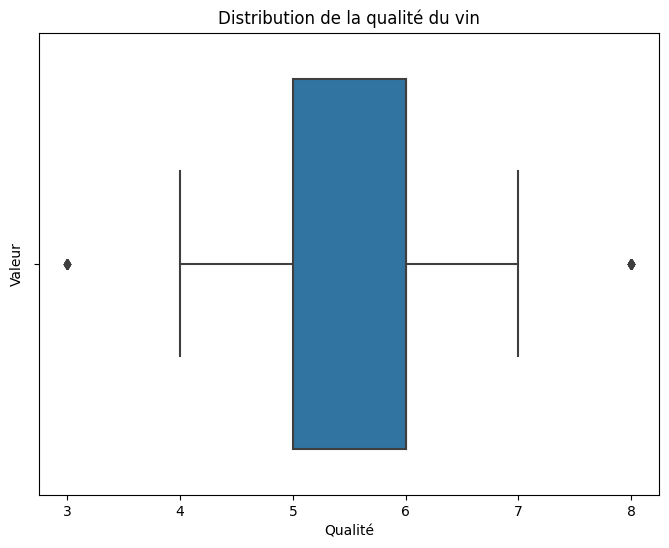

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', data=wine_df)
plt.title('Distribution de la qualité du vin')
plt.xlabel('Qualité')
plt.ylabel('Valeur')
plt.show()

In [15]:
print(wine_df.shape)
print(wine_df['residual sugar'].mean())

(1599, 12)
2.53880550343965


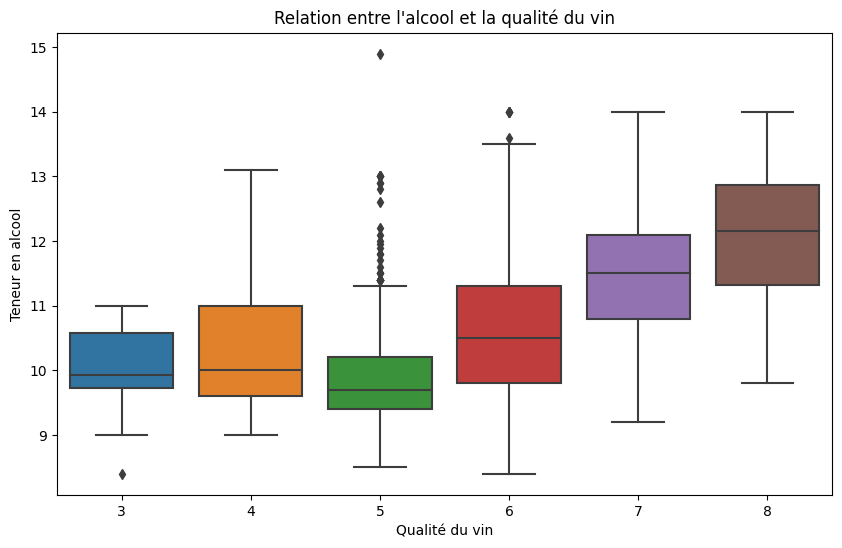

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.title('Relation entre l\'alcool et la qualité du vin')
plt.xlabel('Qualité du vin')
plt.ylabel('Teneur en alcool')
plt.show()

# Analyse de la corrélation entre les caractéristiques

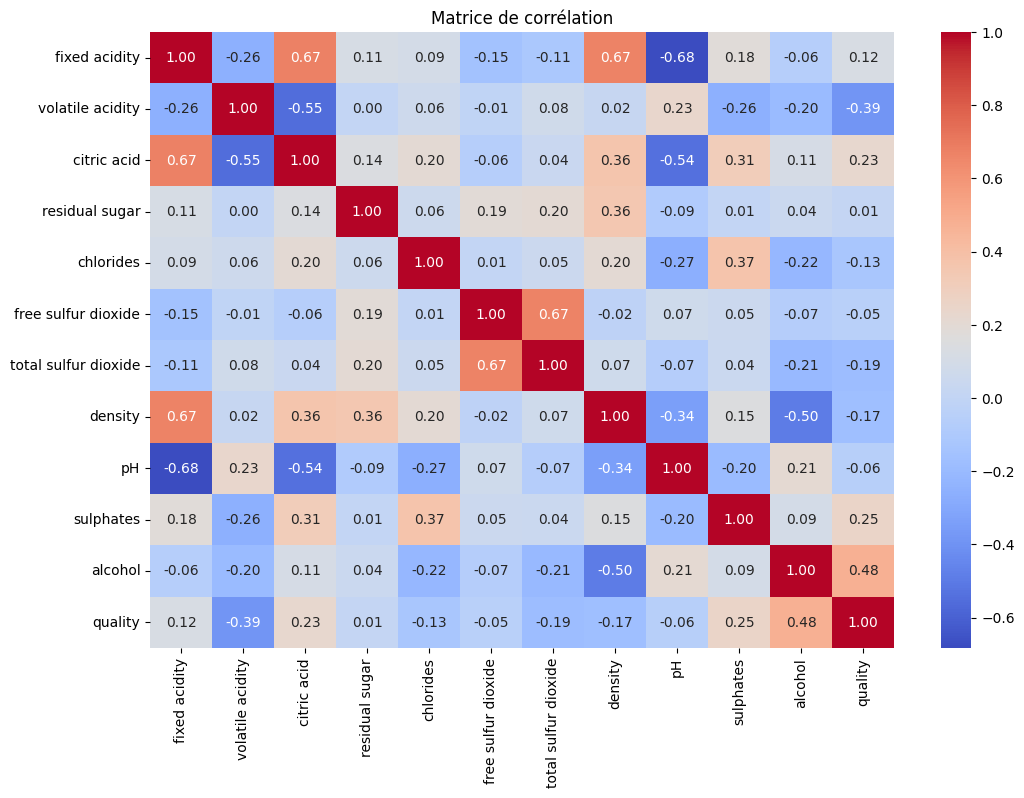

In [18]:
correlation_matrix = wine_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# la target est de savoir si cest du bon vins en fonctions des features qualités et la composition du vin

## Create your own linear model

Get 100 samples with random state (seed) = 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


In [111]:
random_state = 1

# Get 100 samples with random state
sample_df = wine_df.sample(n=100, random_state=random_state)

# Display the sampled DataFrame
display(sample_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


Plot pH in function of fixed acidity

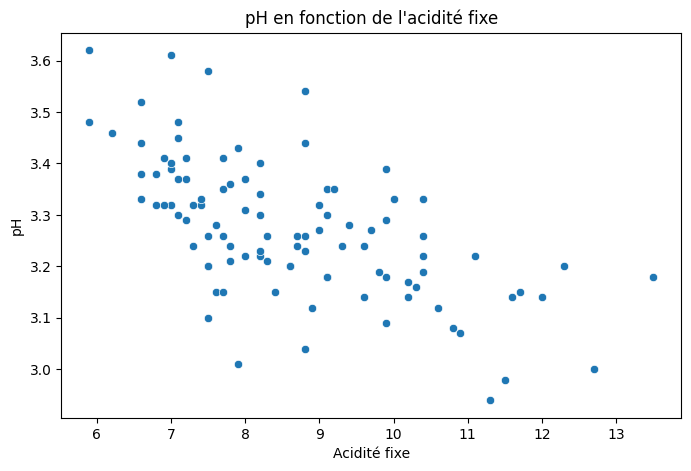

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fixed acidity', y='pH', data=sample_df)
plt.title('pH en fonction de l\'acidité fixe')
plt.xlabel('Acidité fixe')
plt.ylabel('pH')
plt.show()

What can you say about pH and fixed acidity? are they correlated ? 

In [ ]:
#lorsque la concentration d'acide fixe dans le vin augmente, le pH a tendance à diminuer

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and a slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

Pente : -0.10101010101010033
Intercept : 4.2857142857142865
Distance : 16.438271838065372


<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

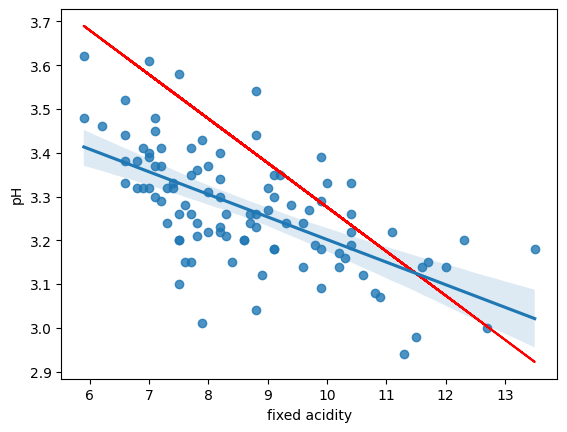

In [112]:
def compute_distance(x, y, slope, intercept):
    y_pred = slope * x + intercept
    distances = np.abs(y - y_pred) / np.sqrt(1 + slope**2)
    return np.sum(distances)

x = sample_df["fixed acidity"]
y = sample_df["pH"]

best_slope = 0
best_intercept = 0
min_distance = float('inf')

for slope in np.linspace(-10, 10, 100):
    for intercept in np.linspace(-10, 10, 50):
        distance = compute_distance(x, y, slope, intercept)
        if distance < min_distance:
            min_distance = distance
            best_slope = slope
            best_intercept = intercept
            
print("Pente :", best_slope)
print("Intercept :", best_intercept)
print("Distance :", min_distance)
plt.plot(x, best_slope * x + best_intercept, color='red', label='Droite de régression')
sns.regplot(x=x, y=y)

what is the best linear model you can find ? try to find the optimal intercept and slope by your own

Hint: create your own algorithm to find the best intercept and slope

Help: if you lack of inspiration, you can try to implement the following algorithm:

1) choose a random $b_1$ and fix it. Then calculate the best $b-0$ that minimize the error of the prediction
- define X (fixed acidity) and y (pH)
- define a $b_1$ fixed
- define a range of $b_0$ to test
- define a function predict(x,b0,b1) that returns the predictions (y_pred)
- define a function calculate_error(y, y_pred) that estimate the sum of squared errors $e = \Sigma_i^{100}|y_i - y_{pred_i}|^2$
- for each $b_0$, find the $b_0 min$ that minimize $e$

2) fix $b_0$ with the $b_0 min$ you find before. Then, calculate the best $b_1 min$ that minimizes the error by following the same steps as before

3) fix $b_1$ with the new $b_1 min$ you found. Then, calculate a new $b_0 min$ that minimizes the error by following the same steps

4) reiterate on 2

In [134]:
X = sample_df["fixed acidity"]
y = sample_df["pH"]

In [135]:
def predict(x, b0, b1):
    return b0 + b1 * x

#def mean_squared_error(y_true, y_pred):
   # return np.mean((y_true - y_pred) ** 2)

def calculate_error(y, y_pred):
    return np.sum((y - y_pred)**2)

In [ ]:

# trop compliqué, à garder pour plus tard dans la formation
def update_parameters(x, y, b0, b1, learning_rate):
    y_pred = predict(x, b0, b1)
    grad_b0 = -2 * np.mean(y - y_pred)
    grad_b1 = -2 * np.mean((y - y_pred) * x)
    new_b0 = b0 - learning_rate * grad_b0
    new_b1 = b1 - learning_rate * grad_b1
    return new_b0, new_b1

def train_linear_model(x, y, initial_b0, initial_b1, learning_rate=0.01, max_iterations=1000, tol=1e-6):
    b0 = initial_b0
    b1 = initial_b1
    for _ in range(max_iterations):
        new_b0, new_b1 = update_parameters(x, y, b0, b1, learning_rate)
        if np.abs(b0 - new_b0) < tol and np.abs(b1 - new_b1) < tol:
            break
        b0, b1 = new_b0, new_b1
    return b0, b1

In [136]:
# Step 3: Calculate the best b1 that minimizes the error
errors = []
best_b0 =4
b1_range =np.linspace(-10, 10, 100)
for b1 in b1_range:
    y_pred = predict(X, best_b0, b1)
    error = calculate_error(y, y_pred)
    errors.append(error)
best_b1_index = np.argmin(errors)
best_b1 = np.linspace(-10, 10, 100)[best_b1_index]

# Step 4: Reiterate
# You can repeat steps 2 and 3 if needed for further refinement of b0 and b1

print("Best b0:", best_b0)
print("Best b1:", best_b1)

Best b0: 4
Best b1: -0.10101010101010033


4


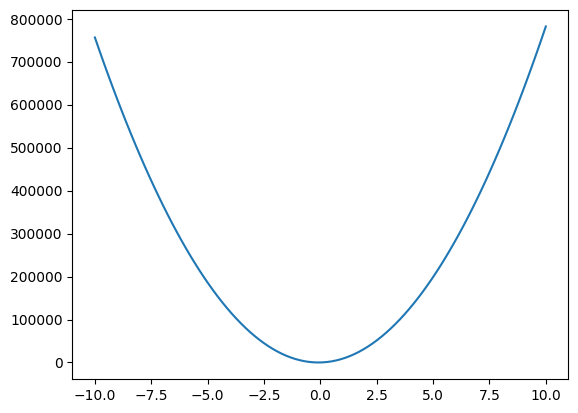

In [138]:

plt.plot(b0_range, errors )
print(best_b0)

-0.10101010101010033


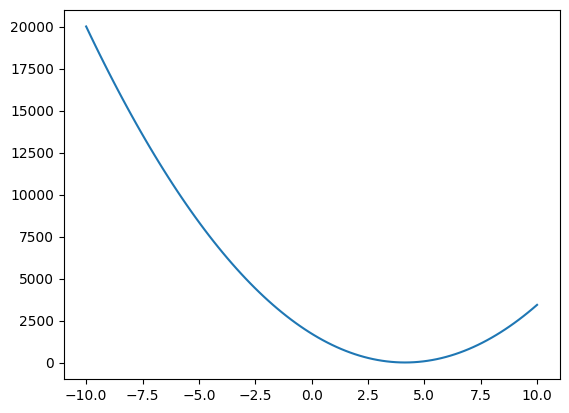

In [102]:
plt.plot(b1_range, errors )
print(best_b1)

In [116]:
# Step 1: Choose a random b1 and fix it
b1_fixed = best_b1
# Step 2: Calculate the best b0 that minimizes the error
b0_range = np.linspace(-10, 10, 100)
errors = []
for b0 in b0_range:
    y_pred = predict(X, b0, b1_fixed)
    error = calculate_error(y, y_pred)
    errors.append(error)
best_b0_index = np.argmin(errors)
best_b0 = b0_range[best_b0_index]

Compare to seaborn regplot

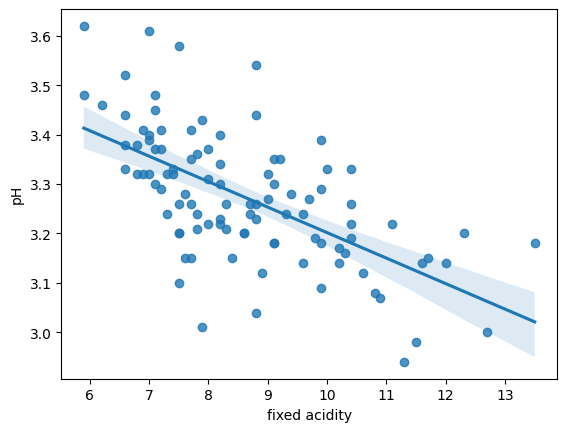

In [118]:
sns.regplot(y='pH', x='fixed acidity', data=sample_df);

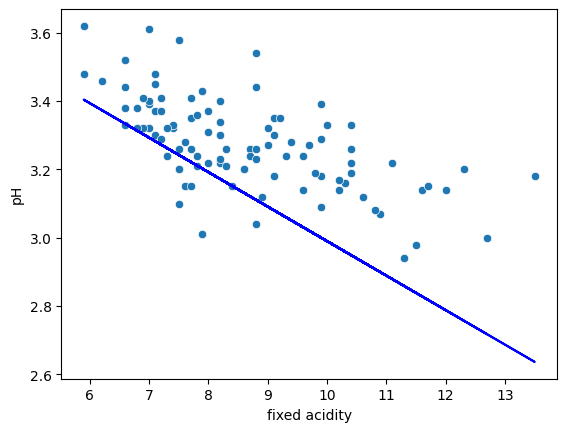

In [139]:
x=sample_df["fixed acidity"]
y= sample_df["pH"]
sns.scatterplot(x=x,y=y, data=sample_df)
plt.plot(x, predict(x, best_b0, best_b1), color='blue', label=f'Linear Model: pH = {best_b0:.2f} + {best_b1:.2f} * Fixed Acidity')

In [32]:
# plot your linear model with regplot and compare

How far is your linear model from seaborn model?

In [ ]:
# cest a peu près pareil

How do you evaluate the performance of your linear models at each iteration ?

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

Intercept final: 1.8051398286897502
Pente finale: 0.16294418932489166


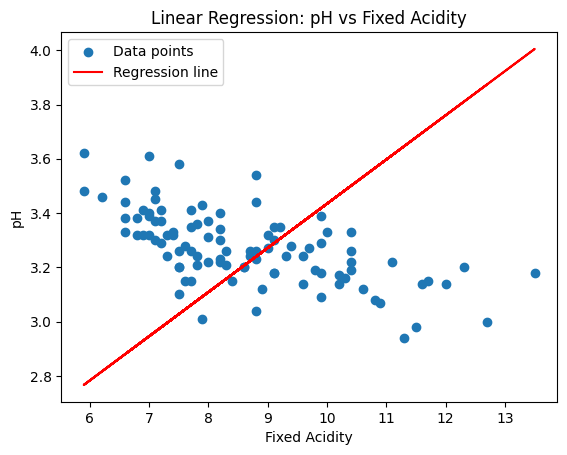

In [71]:


# Données à utiliser
x = sample_df["fixed acidity"]
y = sample_df["pH"]

initial_intercept = 0
initial_slope = 0

# Entrainement du modèle linéaire
final_intercept, final_slope = train_linear_model(x, y, initial_intercept, initial_slope)

print("Intercept final:", final_intercept)
print("Pente finale:", final_slope)


# Define the predicted values using the final intercept and slope
predicted_y = predict(x, final_intercept, final_slope)

# Plot the data points
plt.scatter(x, y, label='Data points')

# Plot the regression line
plt.plot(x, predicted_y, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Linear Regression: pH vs Fixed Acidity')

# Add legend
plt.legend()

# Show plot
plt.show()



How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('float64')) -> None

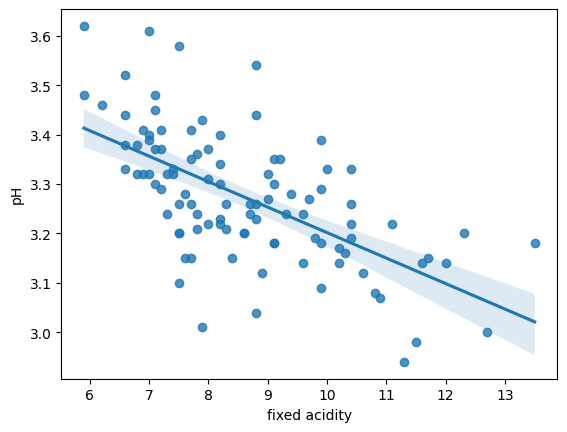

In [172]:
# le maximum d'itération est 1000
sns.regplot(y='pH', x='fixed acidity', data=sample_df_2);

X_vals = np.linspace(min(X), max(X), 100)
y_vals = predict(X_vals, b0, b1)
plt.plot(X_vals, y_vals, color='red', label='Optimized Line')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')





#

Compare with the Linear regression used in scikit learn

In [55]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = sample_df[['fixed acidity']]
y = sample_df['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

[-0.051601]
3.7176554637668797


[-0.051601]
3.7176554637668797


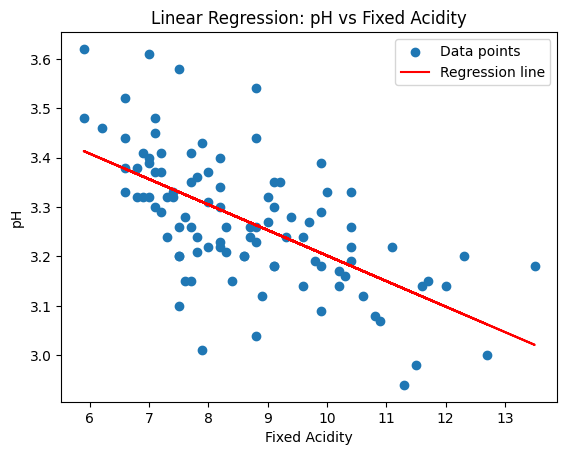

In [73]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = sample_df[['fixed acidity']]
y = sample_df['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)
plt.scatter(X, y, label='Data points')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression line')

# Add labels and title
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Linear Regression: pH vs Fixed Acidity')

# Add legend
plt.legend()

# Show plot
plt.show()

Are you close to these values ?

In [ ]:
# non

How do you interpret these values? What do they say about the pH and fixed acidity?

In [ ]:
#Intercept:ca représente la valeur de pH lorsque l'acidité fixe est nulle,lorsque l'acidité fixe est de zéro, 
#le pH est estimé à environ 3.7056
#pente: une augmentation d'une unité de l'acidité fixe est associée à une diminution d'environ 0.0503 dans le pH.

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [106]:
random_state_60 = 60

# Get 100 samples with random state
sample_df_2 = wine_df.sample(n=100, random_state=random_state_60)

# Display the sampled DataFrame
display(sample_df_2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
150,7.3,0.330,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,9.0,0.600,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,5
677,8.6,0.800,0.11,2.3,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5
712,8.7,0.690,0.00,3.2,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5


Try to plot a regplot with the sckitlearn coefficients, your best coefficient calculated before. Does your best linear model (sklearn) fit with this new sample set ?  Why ?

Hint: read about what is overfit?

In [152]:
model = LinearRegression()

X_new = sample_df_2[['fixed acidity']]
y_new = sample_df_2['pH']

model.fit(X_new, y_new)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: -0.07687905288139371
Intercept: 3.9588041512911536


/home/heloise/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


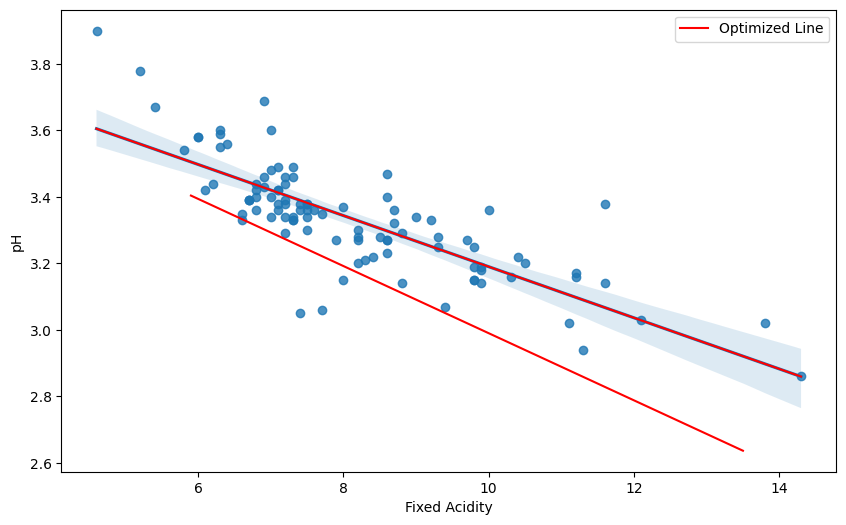

In [156]:
X_plot = np.linspace(X_new.min(), X_new.max(), 100)
y_plot = model.predict(X_plot)

plt.figure(figsize=(10, 6))
sns.regplot(x='fixed acidity', y='pH', data=sample_df_2)
plt.plot(X_plot, y_plot, color='red')
plt.plot(X_vals, y_vals, color='red', label='Optimized Line')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.legend()
plt.show()

How can you solve the problem ?

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [142]:
model = LinearRegression()

X_new = sample_df_2[['pH']]
y_new = sample_df_2['quality']

model.fit(X_new, y_new)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: -0.5093569563691485
Intercept: 7.288552642404198


How good is this model performing? What is the error? is it low or high ?

### Using Holdout method 

Let's use the train split method to divide the dataset in 70% train set and 30% test set. This time we will use another feature. Let's try with fixed acidity this time

In [160]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = sample_df_2[['fixed acidity']]
y = sample_df_2['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.043139473826452335

[-0.07687905]
3.9588041512911536


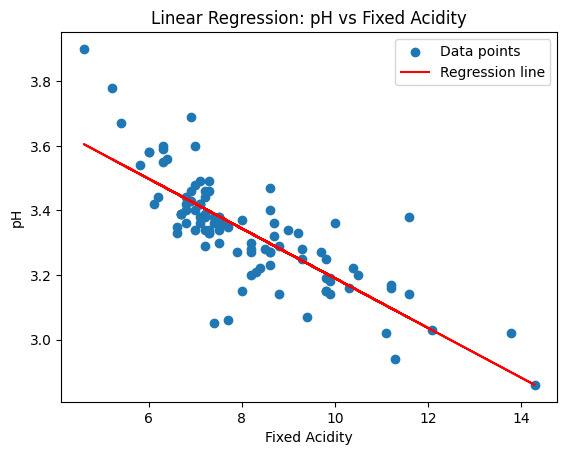

In [161]:
# Instanciate the model
model = LinearRegression()

# Define X and y
X = sample_df_2[['fixed acidity']]
y = sample_df_2['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)
plt.scatter(X, y, label='Data points')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression line')

# Add labels and title
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Linear Regression: pH vs Fixed Acidity')

# Add legend
plt.legend()

# Show plot
plt.show()

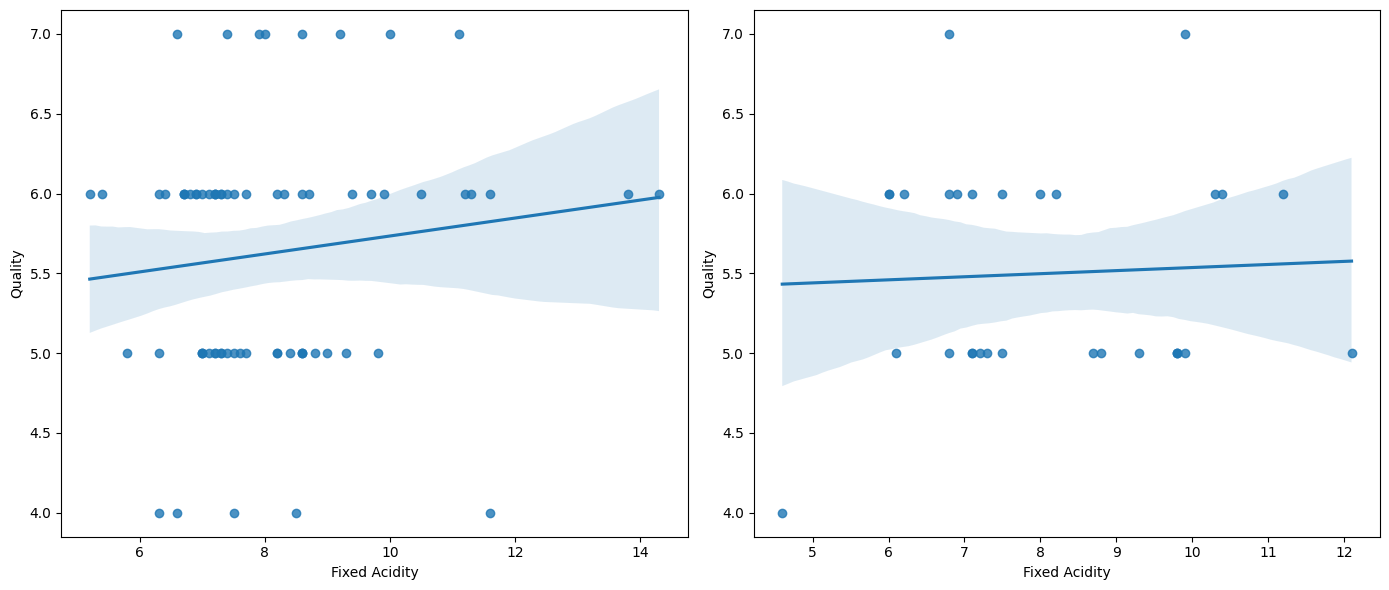

In [162]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=X_train.squeeze(), y=y_train, data= sample_df_2)
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')


plt.subplot(1, 2, 2)
sns.regplot(x=X_test.squeeze(), y=y_test, data= sample_df_2)
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')


plt.tight_layout()
plt.show()

Is this score good or bad? What does it means? 

Try to use regplot to compare with your new model and understand graphically what is happening for the train and test set. you should try two graphics: (one using the X_train,y_train and another one using X_test, y_test)


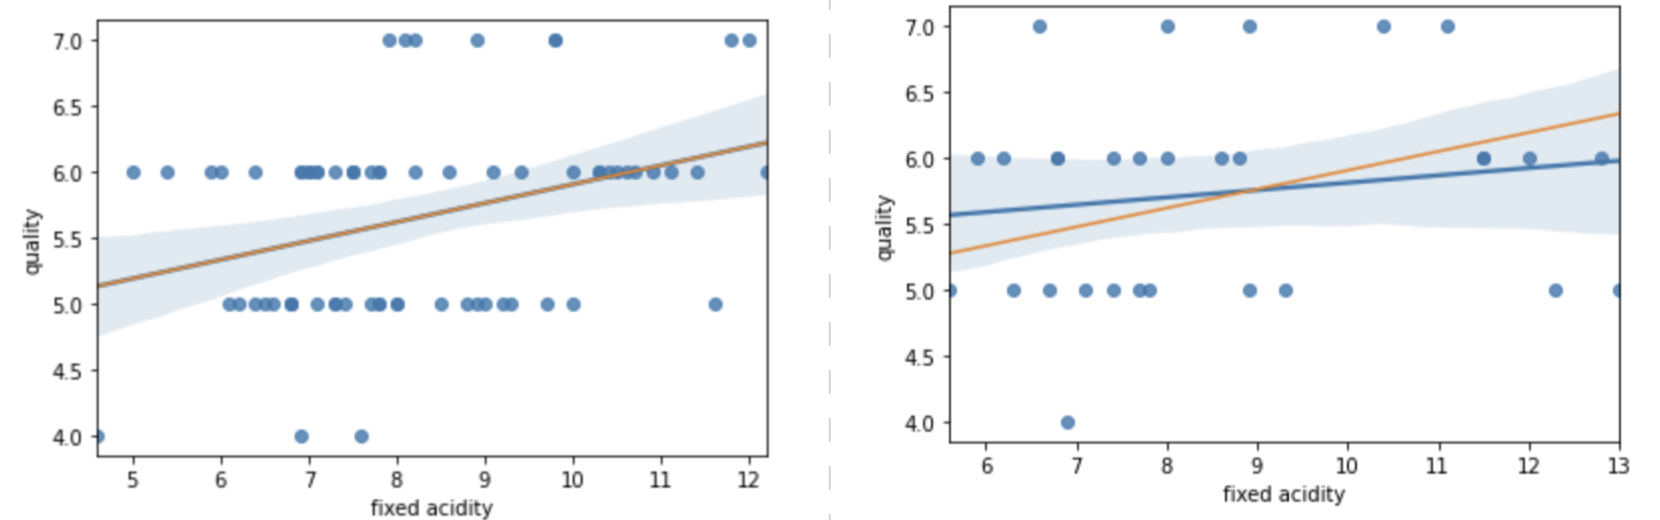

Try another feature. Replace your X with volatile acidity, alcohol ...

Which feature increases this value? 

In [163]:
# volatile acidity
X = sample_df_2[['volatile acidity']]
y = sample_df_2['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)
print("R^2 Score:", model.score(X_test, y_test))

R^2 Score: 0.03988222610578451


Text(0, 0.5, 'Quality')

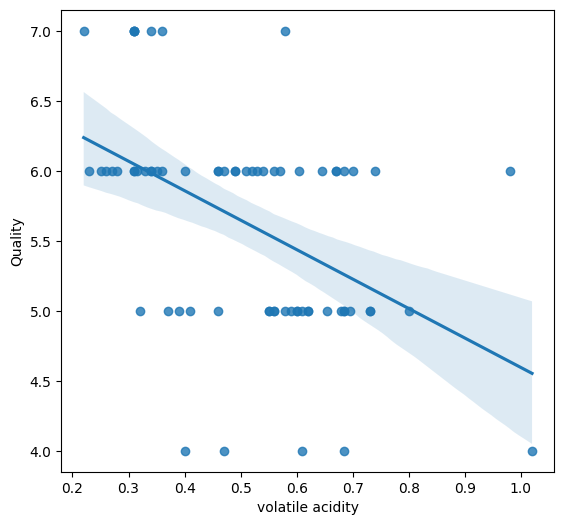

In [164]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=X_train.squeeze(), y=y_train, data= sample_df_2)
plt.xlabel('volatile acidity')
plt.ylabel('Quality')

Do you think you can do better ?

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [165]:
X = sample_df_2[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
X

,pH,alcohol,fixed acidity,density,chlorides
31,3.46,10.6,6.9,0.99660,0.105
844,3.18,10.6,9.9,0.99590,0.062
1573,3.58,12.5,6.0,0.99467,0.075
150,3.33,10.3,7.3,0.99580,0.077
258,3.06,9.4,7.7,0.99680,0.611
...,...,...,...,...,...
1350,3.34,10.0,9.0,0.99654,0.069
677,3.40,9.9,8.6,0.99790,0.084
712,3.36,9.4,8.7,0.99920,0.084
1078,3.27,11.0,8.6,0.99817,0.080


In [166]:
y = sample_df_2['quality']

X_multi = sample_df_2[['pH', 'alcohol', 'fixed acidity', 'density', 'chlorides']]  
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=1)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)
multi_score = model_multi.score(X_test_multi, y_test)
print("Multiple Regression R^2 Score:", multi_score)

X_simple = sample_df_2[['alcohol']]  
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.3, random_state=1)
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)
simple_score = model_simple.score(X_test_simple, y_test)
print("Simple Regression R^2 Score:", simple_score)

Multiple Regression R^2 Score: 0.13940340562378217
Simple Regression R^2 Score: 0.12239771184307402


Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



In [167]:
y = df_suivant['quality']

X_multi = sample_df_2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]  
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=1)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)
multi_score = model_multi.score(X_test_multi, y_test)
print("Multiple Regression R^2 Score:", multi_score)

Multiple Regression R^2 Score: -0.375907695519883


If you add the column quality in the variable X, what would happen ? 

Hint: read about **data leakage**

In [168]:
y = sample_df_2['quality']

X_multi = df_suivant[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]  
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=1)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)
multi_score = model_multi.score(X_test_multi, y_test)
print("Multiple Regression R^2 Score:", multi_score)

Multiple Regression R^2 Score: 1.0


Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [35]:
# Create Classification version of target variable


# Separate feature variables and target variable



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


How many samples are considered as good and how many are bad? Is this balanced

In [171]:
wine_df['goodquality'] = np.where(wine_df['quality'] >= 7, 'good', 'bad')
wine_df
combien = wine_df['goodquality'].value_counts()
combien

bad     1382
good     217
Name: goodquality, dtype: int64

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In classification, how do you evaluate the performance of the model ?

hint: read more about classification_report from scikit learn

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)